In [1]:
import pandas as pd

In [4]:
sales_df = pd.read_csv("./data/Advertising.csv")

In [5]:
sales_df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
sales_df = sales_df.drop( "Unnamed: 0", axis = 1 )

### Data Exploration

In [9]:
import seaborn as sn

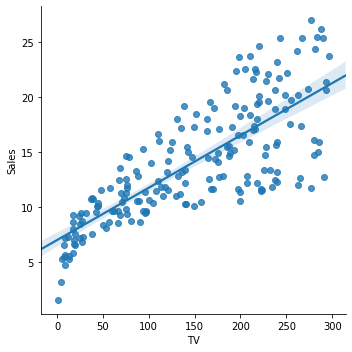

In [77]:
sn.lmplot( data = sales_df,
           x = 'TV',
           y = 'Sales' );

### Setting X and Y Variables

In [12]:
X = pd.DataFrame( sales_df.TV )
y = sales_df.Sales

### Split the dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X,
                                                     y,
                                                     train_size = 0.8,
                                                     random_state = 100 )

In [40]:
X_train.shape

(160, 1)

In [41]:
X_test.shape

(40, 1)

In [42]:
X_train[0:5]

,TV
168,215.4
112,175.7
171,164.5
181,218.5
7,120.2


### Build a Model

### Linear Regression

The model assumes a linear relationship between the outcome and the factor

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lreg_v1 = LinearRegression()

In [45]:
lreg_v1.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lreg_v1.intercept_

7.113008222196275

In [47]:
lreg_v1.coef_

array([0.04610976])

Sales = 7.113 + 0.0461 * (TV)

### Validate

In [48]:
y_pred = lreg_v1.predict( X_test )

In [49]:
y_df = pd.DataFrame( { "actual": y_test,
                       "predicted": y_pred,
                       "residual": y_test - y_pred } )

In [50]:
y_df[0:5]

,actual,predicted,residual
126,6.6,7.472664,-0.872664
104,20.7,18.096352,2.603648
99,17.2,13.347047,3.852953
92,19.4,17.151102,2.248898
111,21.8,18.257736,3.542264


### Calculating Metrics

In [51]:
from sklearn.metrics import mean_squared_error

In [54]:
mse_v1 = mean_squared_error( y_df.actual,
                             y_df.predicted )

In [55]:
mse_v1

9.687069547890871

RMSE (Root Mean Squared Error)

In [57]:
import numpy as np

In [58]:
rmse_v1 = np.sqrt( mse_v1 )

In [59]:
rmse_v1

3.1124057492381794

### R squared 

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score( y_df.actual,
          y_df.predicted )

0.5441581483697225

### Build a model with all parameter

In [62]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df.Sales

In [64]:
X[0:2]

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [65]:
y[0:2]

0    22.1
1    10.4
Name: Sales, dtype: float64

1. Split the dataset
2. Build the mode
3. Measure RMSE and R2

### Model 2

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X,
                                                     y,
                                                     train_size = 0.8,
                                                     random_state = 100 )

In [67]:
lreg_v2 = LinearRegression()

In [68]:
lreg_v2.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lreg_v2.intercept_

2.8172751352950005

In [70]:
lreg_v2.coef_

array([0.0455864 , 0.18569816, 0.00223281])

Sales = 2.81 + 0.0456 (TV) + 0.18 * (Radio) + 0.002 (NP)

In [71]:
y_pred = lreg_v2.predict( X_test )

In [73]:
np.sqrt( mean_squared_error( y_test, y_pred ) )

1.3165457764851067

In [75]:
r2_score( y_test, y_pred )

0.9184369032278497

Sales = 2.81 + 0.0456 (TV) + 0.18 * (Radio) + 0.002 (NP) + Error 

Error = 8%

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models 
4. Feature Engineering - Derive new features from existing features
   - Interaction effect : Synergy Effect ( 1 + 1 = 3 )
     - Multiplication or ratios
   

### Adding a new features

In [79]:
X_train['TV_radio'] = X_train['TV'] * X_train['Radio']
X_test['TV_radio'] = X_test['TV'] * X_test['Radio']

/Users/manaranjan/anaconda/envs/mltraining/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/manaranjan/anaconda/envs/mltraining/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Building  a Model V3 with four parameters

Sales = f( TV, Radio, NP, TV_radio )

1. Build the model
2. Measure RMSE and R2

In [82]:
lreg_v3 = LinearRegression()

In [83]:
lreg_v3.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred = lreg_v3.predict( X_test )

In [85]:
r2_score( y_pred, y_test )

0.9804732905847567

In [86]:
np.sqrt( mean_squared_error(y_pred, y_test) )

0.6527790322684008

### K-Fold Cross Validation Strategy

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score( LinearRegression(),
                          X_train,
                          y_train,
                          cv = 5,
                          scoring = 'r2' )

In [89]:
scores

array([0.96612485, 0.97087485, 0.96926517, 0.97593387, 0.93389054])

In [90]:
scores.std()

0.01500292431852364

### Model Deployement

Serialization of models

In [91]:
from sklearn.externals import joblib

In [92]:
joblib.dump( lreg_v3, "sales.pkl" )

['sales.pkl']